# Bipartite Overview

https://networkx.org/documentation/stable/reference/algorithms/bipartite.html?highlight=bipartite#module-networkx.algorithms.bipartite

In [1]:
import networkx as nx
import psycopg2
import pandas as pd 
import sqlalchemy as salc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import json
from networkx.algorithms import bipartite

warnings.filterwarnings('ignore')



In [2]:
with open("config.json") as config_file:
    config = json.load(config_file)

database_connection_string = 'postgresql+psycopg2://{}:{}@{}:{}/{}'.format(config['user'], config['password'], config['host'], config['port'], config['database'])

dbschema='augur_data'
engine = salc.create_engine(
    database_connection_string,
    connect_args={'options': '-csearch_path={}'.format(dbschema)})

In [3]:
B = nx.Graph()

In [4]:
# Add nodes with the node attribute "bipartite"

B.add_nodes_from([1, 2, 3, 4], bipartite=0)

B.add_nodes_from(["a", "b", "c"], bipartite=1)

# Add edges only between nodes of opposite node sets

B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

In [5]:
nx.is_connected(B)


True

In [6]:


bottom_nodes, top_nodes = bipartite.sets(B)

In [7]:
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}

bottom_nodes = set(B) - top_nodes

In [8]:
print(round(bipartite.density(B, bottom_nodes), 2))

0.5


In [9]:
G = bipartite.projected_graph(B, top_nodes)

In [10]:
RB = bipartite.random_graph(5, 7, 0.2)

RB_top = {n for n, d in RB.nodes(data=True) if d["bipartite"] == 0}

RB_bottom = set(RB) - RB_top

list(RB_top)




[0, 1, 2, 3, 4]

In [11]:
list(RB_bottom)

[5, 6, 7, 8, 9, 10, 11]

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.edgelist.read_edgelist.html#networkx.algorithms.bipartite.edgelist.read_edgelist

# Getting Actual Augur Network Data

In [12]:
contrib_net = pd.DataFrame()

net_query = salc.sql.text(f"""
            SELECT 
                a.cntrb_id,
                a.repo_id,
                b.repo_name,
                b.repo_git,
                a.login, 
                MAX ( RANK ) AS weight 
            FROM
                explorer_contributor_actions a,
                repo b 
            WHERE
                a.repo_id = b.repo_id 
            GROUP BY
                a.cntrb_id,
                a.repo_id,
                b.repo_name,
                b.repo_git,
                a."login"
            ORDER BY
                repo_id;  

                """)

network = pd.read_sql(net_query, con=engine)

display(network)

network.dtypes

,cntrb_id,repo_id,repo_name,repo_git,login,weight
0,25537,1,rails,https://github.com/rails/rails.git,jcoyne,49
1,25566,1,rails,https://github.com/rails/rails.git,jeremyf,8
2,25577,1,rails,https://github.com/rails/rails.git,cbeer,1
3,25635,1,rails,https://github.com/rails/rails.git,twalpole,10
4,25952,1,rails,https://github.com/rails/rails.git,nicolasfranck,1
...,...,...,...,...,...,...
22322,25640,26093,xslt,https://github.com/ropensci/xslt,cboettig,1
22323,25678,26093,xslt,https://github.com/ropensci/xslt,jimhester,3
22324,25717,26093,xslt,https://github.com/ropensci/xslt,zkamvar,1
22325,42393,26093,xslt,https://github.com/ropensci/xslt,oggioniale,1


cntrb_id      int64
repo_id       int64
repo_name    object
repo_git     object
login        object
weight        int64
dtype: object

In [13]:
augNet = nx.Graph()

In [14]:
# Add distinct repo ids
# Add distinct contrib ids
# Add edges between them 

In [15]:
nodecontrb = network['cntrb_id']#.unique()

In [16]:
print(nodecontrb)

0        25537
1        25566
2        25577
3        25635
4        25952
         ...  
22322    25640
22323    25678
22324    25717
22325    42393
22326    51433
Name: cntrb_id, Length: 22327, dtype: int64


In [17]:
noderepo = network['repo_git']#.unique()

In [18]:
#print(noderepo)
networker = pd.DataFrame({'repo': noderepo, 'contrib': nodecontrb})

In [19]:
augNet.add_nodes_from(networker.contrib, bipartite=0)

In [20]:
nx.is_connected(augNet)

False

In [21]:
augNet.add_edges_from(networker.values)

In [22]:
# MASSIVE
#augNet.nodes

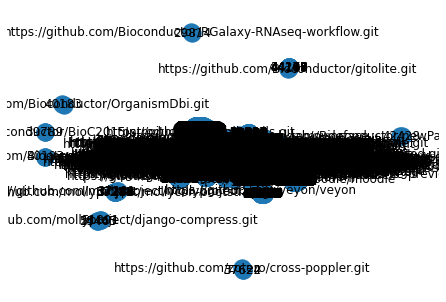

In [23]:
nx.draw(augNet, with_labels=True)

In [31]:
plt.show()  

## This does not work. 

In [25]:
#augNet.add_nodes_from(networker.repo, bipartite=1)

In [26]:
#augNet.add_edges_from(networker.values)

In [27]:
#augNet.add_nodes_from(nodecontrb, bipartite=0)

In [28]:
#noderepo2 = np.array2string(noderepo)

In [29]:
#augNet.add_nodes_from[noderepo2, bipartite=1)

In [30]:
#print(noderepo2)

https://www.geeksforgeeks.org/numpy-ndarray/